In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
#from scipy import *


# Méthodes numériques 

## TD/TP n° 2 - Intégration numérique 

### Exercice 1 - méthode des rectangles et des trapèzes

Retrouver les formules de quadrature pour la méthode des rectangles et  des trapèzes, ainsi que l'ordre de ces méthodes.

Écrire deux fonctions `MethPointMil(a,b,f)` et `MethTrap(a,b,f)` qui calculent une approximation de l'intégrale de la fonction `f` sur le segment `[a,b]` respectivement par la méthode des rectangles point milieu et la méthode des trapèzes.

On considère la fonction $f(x)=\cos(x)$ dans l'intervalle $[0,2].$
Tracer sur une même figure le graphe de la fonction $f(x)$ sur l'intervalle $[0,2]$ et 
l'aire correspondante associée aux formules de quadrature précédentes. Utiliser la fonction 'fill_between' pour colorier le domaine délimité par l'axe des abscisses et le graphe d'une fonction.   

Déterminer numériquement l'erreur pour les deux formules de quadrature dans ce cas particulier.
Est-on en accord avec la théorie ?


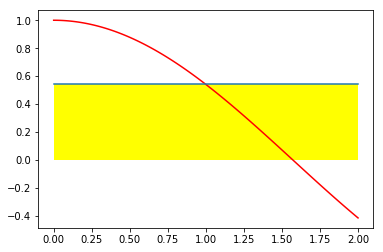

In [6]:
def MethPointMil(a,b,f):
    return (b-a)*f((a+b)/2)
def MethTrap(a,b,f):
    return ((b-a)/2)*(f(a)+f(b))
x=linspace(0,2,100)
y=cos(x)
plot(x,y,'r')
plot([0,2],[cos(1),cos(1)])
#plot([0,2],[cos(0),cos(2)])
fill_between([0,2],0,[cos(1),cos(1)],facecolor='yellow')


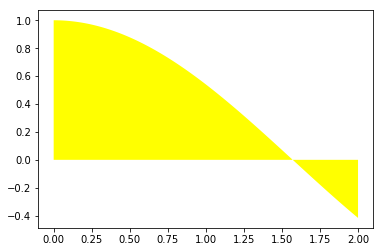

In [4]:
fill_between(x,0,y,facecolor='yellow')

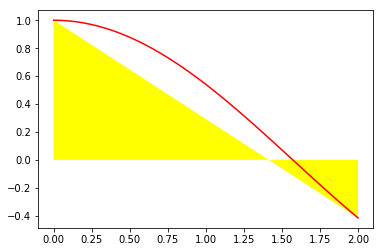

In [12]:
x=linspace(0,2,100)
y=cos(x)
plot(x,y,'r')
fill_between([0,2],0,[cos(0),cos(2)],facecolor='yellow')

### Exercice 2  

Écrire une fonction `MethComp(Meth,a,b,f,N)`, qui retourne une approximation
numérique de l'intégrale de la fonction `f` sur `[a,b]`, en utilisant la méthode d'intégration composite sur `N` sous-intervalles construite à partir de la méthode d'intégration `Meth`.

Ici, `Meth` est une méthode d'intégration numérique quelconque -- autrement dit, `Meth(a,b,f)` retourne une approximation de l'intégrale de `f` sur `[a,b]`.

Utiliser cette fonction pour calculer une approximation de la fonction $f(x)=\cos(x)$ par les méthodes composites des rectangles-point milieu et des trapèzes, avec `N` = 25.

Pour chacune des méthodes tracer sur un même graphe la fonction $f(x)=\cos(x)$ sur l'intervalle $[0,2]$ ainsi que 
l'aire coloriée de chacun des rectangles (respectivement trapèzes). 

Déterminer numériquement l'erreur pour chacune des méthodes dans ce cas particulier. Est-on en accord avec la théorie ?


In [22]:
def MethPointMil(a,b,f):
    return (b-a)*f((a+b)/2)
def Methtrapaze(a,b,f):
    return ((b-a)/2)*(f(a)+f(b))
def Methomilcom(a,b,f,N):
    A=0
    X=linspace(a,b,N+1)
    for i in range(N):
        A=A+MethPointMil(X[i],X[i+1],f)
    return A

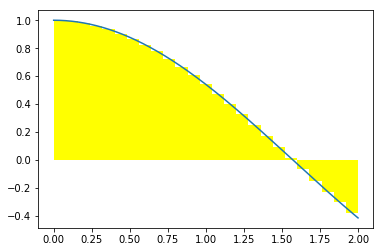

In [6]:
a=0
b=2
N=25
# methode des rectangles
for i in range(N):
    X=linspace(a,b,N+1)
    Xmil = (X[i]+X[i+1])/2
    fill_between([X[i],X[i+1]],0,[cos(Xmil),cos(Xmil)],facecolor='yellow')
Z=linspace(a,b,1000)
Y=cos(Z)
plot(Z,Y)

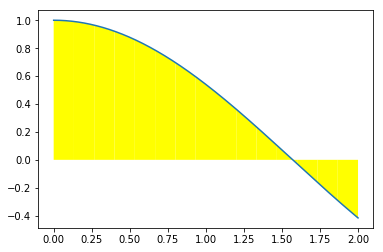

In [15]:
a=0
b=2
N=15
#methodes des trapezes
for i in range(N):
    X=linspace(a,b,N+1)
    #Xmil = (X[i]+X[i+1])/2
    fill_between([X[i],X[i+1]],0,[cos(X[i]),cos(X[i+1])],facecolor='yellow')
Z=linspace(a,b,1000)
Y=cos(Z)
plot(Z,Y)

### Exercice 3

Soient $x_{1},x_{2}\in [-1,1]$, $x_1 < x_2$, et $\lambda _{1},\lambda _{2}\in \mathbb{R}.$ 

On
définit, pour $f$ une fonction continue sur $[-1,1]$, la méthode d'intégration numérique $T$ de la façon suivante :
$$ T(f)=\lambda_1 f(x_1)+ \lambda_2 f(x_2).$$
 
a) Montrer que $T$ est au moins d'ordre 1 sur $[-1,1]$ si et seulement si $\lambda_1 = \frac{2 x_2}{x_2 - x_1}$
et $\lambda_2 = \frac{2 x_1}{x_1 - x_2}$. 
 
b) Pour quelles valeurs de $\lambda_1$, $\lambda_2$, $x_1$ et $x_2$, $T$ est-elle au moins d'ordre 3 ? Quel est alors l'ordre de la méthode ? 

c) Déduire des questions précédentes une méthode d'intégration d'ordre 3 sur un segment $[a,b]$ quelconque.

c) Programmer la méthode d'intégration obtenue, puis la méthode d'intégration composite correspondante. Vérifiez l'ordre de la méthode en traçant la courbe d'erreur quand on intègre $\cos$ sur $[0,2]$.


### Exercice 4

Soit $f:[-1,1]\longrightarrow \mathbb{R}$ une fonction de classe $C^2$ 
et soient $x_0$, $x_1\in[-1,1]$ avec $x_0\neq x_1$.

1)  a) Donner l'expression du polynôme 
d'interpolation $p_1$ de $f$ associé aux 
noeuds $x_0$, $x_1$ dans la base de Lagrange.

   b) Donner la formule d'erreur $f(x)-p_1(x)$ en fonction de 
$M=\sup_{x\in[-1,1]}|f''(x)|.$

2)  On prend 
$J(f)=\displaystyle{\int_{-1}^{1}p_1(x)\,dx}$ pour approximation de 
 $I(f)=\displaystyle{\int_{-1}^{1}f(x)\,dx}.$
 
a) Montrer qu'il existe $\lambda_0$, $\lambda_1\in \mathbb{R}$ tels que
  $J(f)=\lambda_0 f(x_0)+\lambda_1f(x_1).$ 
  
  b) Donner une majoration de l'erreur $|I(f)-J(f)|$ en fonction de 
$M.$ 


### Exercice 5

Retrouver la formule de quadrature pour la méthode de Simpson. 

Tracer sur un même graphe la fonction $f(x)=\cos(x)$ sur l'intervalle $[0,2]$ ainsi que l'aire coloriée de la parabole définie par la méthode de Simpson. Utiliser la fonction d'interpolation 'PolIntLag' définie au TP sur l'interpolation. 

Déterminer numériquement l'erreur de quadrature dans ce cas particulier.
Est-on en accord avec la théorie ?



### Exercice 6

Écrire une fonction générale 'quadn(X,a,b)' donnant les coefficients $\alpha_i, i=0, \ldots, n$ de la formule de quadrature $I_n(f)=\sum_{i=0}^n \alpha_i f(x_i)$ approchant l'intégrale $\int_a^b f(t) \, dt$, basée sur les points $a=x_0 < x_1 < \ldots < x_{n-1} < x_n = b$ (vecteur X ordonné) et exacte pour les polynômes $p$ de degré $\leq n.$



### Exercice 7

Écrire une fonction 'evalquadn(f,X,alpha)' donnant l'intégrale approchée d'une fonction $f$ par la formule de quadrature $I_n(f)=\sum_{i=0}^n \alpha_i f(x_i).$

Vérifier numériquement que la méthode des trapèzes est inexacte à l'ordre 2 et que la méthode de Simpson est exacte à l'ordre 3. Peut-on montrer mathématiquement ce résultat ?  


### Exercice 8  
(formule de quadrature composite générale)

En utilisant le fonction 'quadn', écrire une fonction 'quadcompnm(a,b,n,m)' donnant les coefficients $\beta_k$ de la formule de quadrature composite $IC_{n,m}(f)=\sum_{k=0}^{nm} \beta_k f(x_k)$ obtenue en subdivisant l'intervalle d'intégration $[a,b]$ en $m$ sous-intervalles égaux et en considérant dans chaque sous-intervalle la formule de quadrature basée sur $n+1$ points équidistants (formule exacte pour les polynômes de degré $\leq n$).   

Déterminer l'erreur de quadrature pour la fonction $f(x)=\cos(x)$ sur l'intervalle $[0,2]$ avec une formule de Simpson composite.   


### Exercice 9
(comparaison des ordres des erreurs pour les méthodes composites des trapèzes et de Simpson) 

Tracer en fonction de $m$ (nombre de sous-intervalles) sur un graphe log-log les erreurs pour les méthodes composites des trapèzes et de Simpson pour la fonction $f(x)=\cos(x)$ sur l'intervalle $[0,2]$ . Les résultats sont-ils conformes avec la théorie ? 


### Exercice 10
(examen de janvier 2016)

Soit $f : [0,1] \mapsto \mathbb{R}$ une application de classe $C^1$.

a) A l'aide d'un développement de Taylor de la fonction
$$
F(x) = \int_0^x f(t)\, dt
$$
montrer qu'il existe $c \in ]0,1[$ tel que $\int_0^1 f(t) \, dt = f(0) + \frac{f'(c)}{2}.$

b) On propose d'approcher l'intégrale 
$$
I(f) = \int_0^1 f(t)\, dt
$$
par une formule du type 
$$
J(f) = f(0) + \frac{f'(\alpha)}{2}
$$
pour $\alpha\in ]0,1[$ à déterminer.

1 - b) Montrer que $J$ est exacte pour les polynômes de degré inférieur ou égal à un quelque soit le choix de $\alpha\in ]0,1[.$

2 -  b) Déterminer $\alpha$ pour que l'approximation $J(f)$ soit exacte pour les polynômes de degré au plus égal à deux.

3 - b) Pour le choix de $\alpha$ de la question 2-b), quel est l'ordre de la méthode ?


On fixe désormais $\alpha$ comme à la question 2-b).

c) On suppose que $f \in C^3([0,1])$. A l'aide d'un développement de Taylor de $F(x)$, montrer qu'il existe $d \in ]0,1[$ tel que
$$
I(f) = f(0) + \frac{1}{2} f'(0) + \frac{1}{6} f''(0) + \frac{1}{24} f^{(3)}(d).
$$
A l'aide d'un développement de Taylor de $f'(\alpha)$, montrer alors que 
$$
\vert I(f) - J(f) \vert \leq \frac{5}{72} \sup_{x\in [0,1]} \vert f^{(3)} (x) \vert.
$$

d) Soient $h>0$ et $a \in \mathbb{R}$ tels que $[a,a+h] \subset [0,1]$.

1 - d) Justifier la formule 
$$
\int_a^{a+h} f(t) \, dt = h \int_0^1 f_h(t)\, dt
$$
avec $f_h(t) = f(a+ht)$.

2 - d) A partir des questions précédentes, proposer une formule d'approximation 
$J_{a,h}(f)$ pour 
$$
I_{a,h}(f) = \int_a^{a+h} f(t) \, dt
$$
qui soit exacte pour les polynômes de degré au plus égal à deux.

3 - d) Montrer que pour tout $f \in C^3([0,1])$, on a $\displaystyle \vert I_{a,h}(f) - J_{a,h}(f) \vert \leq \frac{5\, h^4}{72} \sup_{x\in [0,1]} \vert f^{(3)} (x) \vert.$


